<h1 style="font-size:30px;color:black;text-align:center; text-decoration:underline">                   An Analysis of 20 Years Of Games              
</h1>
<img src="https://i.ytimg.com/vi/HhEcskddc5A/maxresdefault.jpg" alt="github" width=50% height=50%>

## What I will do for this Analysis  
First, thanks a lot to the great kernel in this competition like this [20-years-of-games-analysis](https://www.kaggle.com/ash316/20-years-of-games-analysis), I learned a lot from them. And they also inspired me to think how to analysis this dataset from other perspective.  
So, at first I need ask questions about the dataset, then we analyse this data according to those questions to see the answer for these questions.  

**What's the trend for games on different platforms, but in big classes, like PC, mobile, console ?**  
    As we all know, although there are many kinds of platforms, they all belong too several big classes and be different only because from different company. **Compare to analyse these various platform, I think analyse big classes will more reveal the trend.** You can see, when we are young we always play just on console like FC, then we change to portable GB, then PC, then mobile.  
    So I just wonder maybe the whole game number are decline, but in some class like mobile they are increase. In this way we can see the change and development. For the sub questions, we would like do like follow.  1.**Scores and genres distribution**, 2.**Game number change as the time change.**


**What's the relation between score and editors_choice ?**  
    When I check the top kernels, I find there are few people analyse this. So I want to give it a try.  


**Normal Analysis**  
    I will also do some normal analysis to this data as other kernels, because I want to practice my skills. But I will try to do it in some kind of new ways.  
    Here one thing I want to try is that, when I see other word cloud made by others, there are some words is no meaning like edition, I, II. So I want to clear them, and **make a better word cloud**.
    
    
    

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

In [2]:
game_df = pd.read_csv('../data/ign.csv')
game_df.head()

,Unnamed: 0,score_phrase,title,url,platform,score,genre,editors_choice,release_year,release_month,release_day
0,0,Amazing,LittleBigPlanet PS Vita,/games/littlebigplanet-vita/vita-98907,PlayStation Vita,9.0,Platformer,Y,2012,9,12
1,1,Amazing,LittleBigPlanet PS Vita -- Marvel Super Hero E...,/games/littlebigplanet-ps-vita-marvel-super-he...,PlayStation Vita,9.0,Platformer,Y,2012,9,12
2,2,Great,Splice: Tree of Life,/games/splice/ipad-141070,iPad,8.5,Puzzle,N,2012,9,12
3,3,Great,NHL 13,/games/nhl-13/xbox-360-128182,Xbox 360,8.5,Sports,N,2012,9,11
4,4,Great,NHL 13,/games/nhl-13/ps3-128181,PlayStation 3,8.5,Sports,N,2012,9,11


In [3]:
game_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18625 entries, 0 to 18624
Data columns (total 11 columns):
Unnamed: 0        18625 non-null int64
score_phrase      18625 non-null object
title             18625 non-null object
url               18625 non-null object
platform          18625 non-null object
score             18625 non-null float64
genre             18589 non-null object
editors_choice    18625 non-null object
release_year      18625 non-null int64
release_month     18625 non-null int64
release_day       18625 non-null int64
dtypes: float64(1), int64(4), object(6)
memory usage: 1.6+ MB


## Analyse the trend for big classes

In [4]:
game_df[game_df['platform']=='Web Games']

,Unnamed: 0,score_phrase,title,url,platform,score,genre,editors_choice,release_year,release_month,release_day
16594,16594,Great,Realm of the Mad God,/games/realm-of-the-mad-god/web-127936,Web Games,8.0,"Action, RPG",N,2012,3,5


In [5]:
# Show unique platforms, and their numbers
# We can see PC have most games, and then the several major platform just as we expected
game_df['platform'].value_counts()

PC                      3370
PlayStation 2           1686
Xbox 360                1631
Wii                     1366
PlayStation 3           1356
Nintendo DS             1045
PlayStation              952
Wireless                 910
iPhone                   842
Xbox                     821
PlayStation Portable     633
Game Boy Advance         623
GameCube                 509
Game Boy Color           356
Nintendo 64              302
Dreamcast                286
PlayStation 4            277
Nintendo DSi             254
Nintendo 3DS             225
Xbox One                 208
PlayStation Vita         155
Wii U                    114
iPad                      99
Lynx                      82
Macintosh                 81
Genesis                   58
NES                       49
TurboGrafx-16             40
Android                   39
Super NES                 33
NeoGeo Pocket Color       31
N-Gage                    30
Game Boy                  22
iPod                      17
Sega 32X      

In [6]:
# Divide Platforms (I find I learned a lot about game platform history from this divide procedure ) ^-^
# Personal computer in general mearning
PC = ['PC', 'Macintosh', 'Linux', 'Web Games', 'SteamOS']
mobile = ['iPad', 'iPhone', 'Android', 'Wireless', 'iPod', 'Commodore 64/128', 'Windows Phone', 'Windows Surface']
console = ['Saturn', 'Xbox 360', 'PlayStation 3', 'Wii', 'PlayStation 4', 'PlayStation', 'Nintendo 64', \
           'Dreamcast', 'Arcade', 'Nintendo 64DD', 'PlayStation 2', 'Xbox', 'GameCube', 'DVD / HD Video Game', \
           'NES', 'Genesis', 'TurboGrafx-16', 'Super NES', 'Master System', 'NeoGeo', 'Atari 5200', 'TurboGrafx-CD', \
           'Atari 2600', 'Sega 32X', 'Vectrex', 'Sega CD',  'Xbox One', 'Ouya', ]
hand_console = ['PlayStation Vita', 'Nintendo DS', 'Nintendo 3DS', 'Wii U', 'PlayStation Portable', 'Lynx', \
                'Game Boy', 'Game Boy Color', 'NeoGeo Pocket Color', 'Game.Com', 'Dreamcast VMU', 'WonderSwan', \
                'WonderSwan Color', 'Game Boy Advance', 'Pocket PC', 'N-Gage',  'Nintendo DSi', 'New Nintendo 3DS']

In [7]:
# A map function
def map_platform(platform):
    if platform in PC:
        return 'PC'
    elif platform in mobile:
        return 'mobile'
    elif platform in console:
        return 'console'
    else:
        return 'hand_console'

In [8]:
class_df = game_df.copy()
class_df['platform'] = game_df['platform'].apply(map_platform)

### Platform share

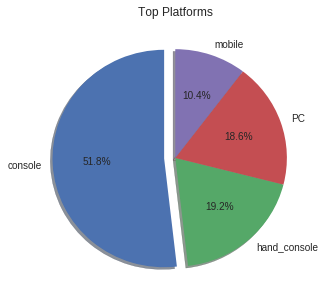

In [9]:
fig1, ax1 = plt.subplots(figsize=(5,5))
class_df['platform'].value_counts().plot.pie(shadow=True, autopct='%1.1f%%', startangle=90, \
                                            explode=[0.1, 0, 0, 0], ax=ax1)
ax1.set_title('Top Platforms')
ax1.set_ylabel('')

#### Observation
Although, from this [20-years-of-games-analysis](https://www.kaggle.com/ash316/20-years-of-games-analysis) kernel, **it looks like many game be released on personal computer, many games are still released on each console platforms**.  
So we can see games on PC are not even more than games on handhold game console. After all, personal computer is not only for games.

### Time trend

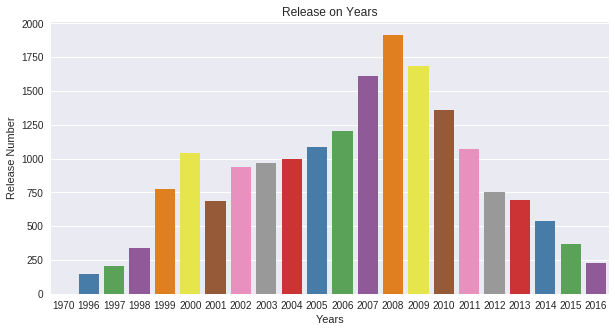

In [10]:
# General Trend
fig2, ax2 = plt.subplots(figsize=(10,5))
sns.countplot(class_df['release_year'], palette='Set1').set_title('Release on Years')
ax2.set_xlabel('Years')
ax2.set_ylabel('Release Number')

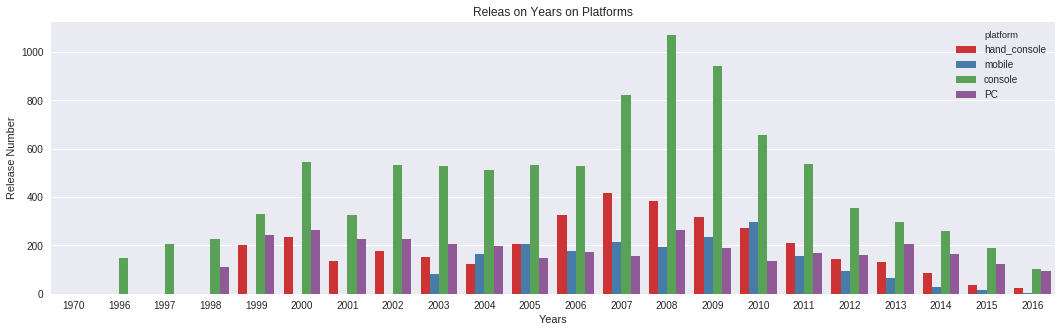

In [11]:
# Time trend according to each platforms
fig3, ax3 = plt.subplots(figsize=(18,5))
sns.countplot(data=class_df,x='release_year',hue='platform', palette='Set1')
ax3.set_title('Releas on Years on Platforms')
ax3.set_xlabel('Years')
ax3.set_ylabel('Release Number')

#### Observation
From above two graphs, we can find many interesting things.  
  
First, **from the appearance of each platform on ign as the time pass, we can see the development of ign.** If you check the history of IGN, and then look at this graph, we will discover many things.

For example, we can find, **before 1998, there is no PC and handheld console games on IGN.** Why? In fact, there are many good games on both two platforms, like Diablo(1996) on PC platform.  

The reason is that **before 1998, ign are composited by five web sites all only focus on console games**. They are N64.com (later renamed ign64.com), PSXPower, Saturnworld, Next-Generation.com and Ultra Game Players Online. And if you look carefully to their names, you will find they are all name of consoles. N64 for Nintendo 64, PSXPower for Play Station, Saturnworld for Saturn, and for Next-Generation.com and Ultra Game Players Online both of them are focus on console games.

Then, **from 1998, the IGN company lauched a new homepage**, which have more than 30 different channels including the 5 website mentioned above. So we can see, suddenly, the PC and handheld console games appear from 1998 on the graph.

Several years latter, we can see mobile game begin to appear. We can assume that they opened the cell game channel at this time. If we check the history of cell phone, we can see at this period the phone with color screen begin to appear.

----
Second, **from the second graph we can see the trend of games on each platform clearly, not just get a rough view of all the games.**. So we can see the first graph not reveal the development of game on all the platforms, in fact, the overall trend is mostly depend on the games on consoles. we can see the fluctuation of first graph and the console platform of second graph are quite same.

For PC games, I want to see its peak maybe in the beginning of 21th century. We can see the first several year of this century and 1999, there are quite number of PC game when compare with other year. 2008 year is just have a burst at that year.

For handheld console, its peak is in 2007. For mobile games, its peak would be 2010.

**So the only reason why other people say that 2008 year is the best year for games market is that, because this year there are many console game are published, and many guys play game on consoles.**

---
One more thing I would like to point out is that, why from 2006 year there is an outburst for console games. I think the reason is that **in the 2006 Sony and Nintendo released PS3 and Wii, the two great platforms.** Maybe we will say "Wait! Why no XBOX 360?" Because I don't play it. Haha.

In the same sense, we can assume it is **because the release of NDS and PSP, so there is an outburst in games on handheld console platform.**



### Genre and score on each platforms

#### Score

In [12]:
score_list = ['Masterpiece', 'Amazing', 'Great', 'Good', 'Okay', 'Mediocre', \
              'Bad', 'Awful', 'Painful', 'Unbearable', 'Disaster']

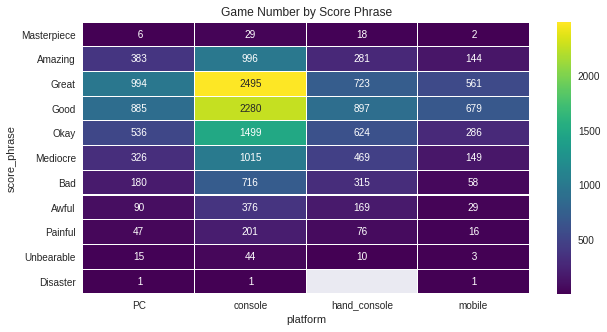

In [13]:
# Score phrase on each platforms
fig4, ax4 = plt.subplots(figsize=(10,5))
plat_score = class_df.groupby(['platform', 'score_phrase'])['score'].count().reset_index()
plat_score = plat_score.pivot('score_phrase', 'platform','score')
plat_score = plat_score.reindex(score_list)
sns.heatmap(plat_score, annot=True, fmt='2.0f', cmap='viridis', linewidths=0.1)
ax4.set_title('Game Number by Score Phrase')

#### Observation
In fact, from above graph, we can only see many good games on console platform. However, this comparation is unfair, because the total number for console game is big.(because there are many good game on PC!) So we can normalize them.

In [14]:
def normalize(df):
    result = df.copy()
    for platform in plat_score.columns:
        total = df[platform].sum()
        result[platform] = df[platform] / total
    return result

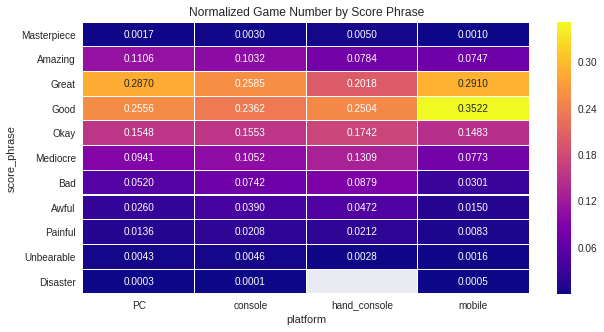

In [15]:
fig5, ax5 = plt.subplots(figsize=(10,5))
norm_plat_score = normalize(plat_score)
sns.heatmap(norm_plat_score, annot=True, fmt='.4f', cmap='plasma', linewidths=0.1)
ax5.set_title('Normalized Game Number by Score Phrase')

#### Observation
From above normalized graph, we can see, in fact, **there is not so much advantage for console platform.** Because even it has the biggest number of good games, but it also have biggest number of bad games. So we can see after normalization, **PC platform have comparative more good games.**

One suprising thing is that, although before normalization, it seems mobile game have the worst quality, we find **mobile's overall quality maybe the best** from the score phrase perspective.

For console and handheld console, it seems they have higher probability to get masterpieces.

#### Genre
One problem for genre analysis is that some game have many genre tags, I think we should split them and put them to each genre. So we need preprocess them.  

And **because same game can be divided to several genres, so I decide divide one row to several rows. But I will give a score to each row.** The score will calculate by 1/(num_genres_of_this_game). For example, if one game is Action,Advanture, then I will divide it to two rows, and each have 1/2=0.5 score. In the end, we sum this score. In this way, we can keep the fair of last calculation.

In [16]:
genre_df = class_df.copy()
# Drop nan row
nan_ind = pd.isnull(genre_df['genre']).nonzero()[0]
genre_df = genre_df.drop(nan_ind)

In [17]:
def split_genre(genre):
    # Split genre string to list
    split_genre = []
    for i in genre.split(','):
        split_genre.append(i.strip())
    return split_genre

In [18]:
def genre_socre(genre):
    return 1/len(genre)

In [19]:
genre_df['genre_score'] = genre_df['genre'].apply(genre_socre)
genre_df['genre'] = genre_df['genre'].apply(split_genre)

In [20]:
multi_tags = genre_df[genre_df['genre'].apply(len) >= 2]
genre_df = genre_df.drop(multi_tags.index)

In [21]:
genre_df['genre'] = genre_df['genre'].apply(''.join)

In [22]:
for i in range(len(multi_tags)):
    for tag in multi_tags['genre'].iloc[i][:]:
        line = multi_tags.iloc[i].copy()
        line['genre'] = tag
        genre_df = genre_df.append(line, ignore_index=True)

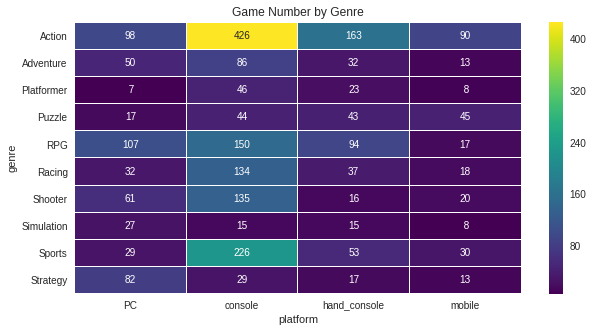

In [23]:
fig6, ax6 = plt.subplots(figsize=(10,5))
max_genres = genre_df.groupby('genre')['genre'].count()
top_10_genres=max_genres.sort_values(ascending=False)[:10]
plat_genre = genre_df[genre_df['genre'].isin(top_10_genres.index)]
plat_genre = plat_genre.groupby(['platform', 'genre'])['genre_score'].sum().reset_index()
plat_genre = plat_genre.pivot('genre', 'platform','genre_score')
sns.heatmap(plat_genre, annot=True, fmt='2.0f', cmap='viridis', linewidths=0.1)
ax6.set_title('Game Number by Genre')

#### Observation
From above graph, we can see for each platform.
1. PC platform. It has the most number of strategy games. This is exactly we can imagine, because for strategy game it's better to use mouse than use gamepad.
2. Console platform. Compare to other platform, the most distinct place is that it has many Racing and Sports game. That is because console can use various simulator to play the sports game.  
3. Console and handheld console platforms have many action games. It is may be the gamepad is suitable for action game.  

Let's check normalized graph.

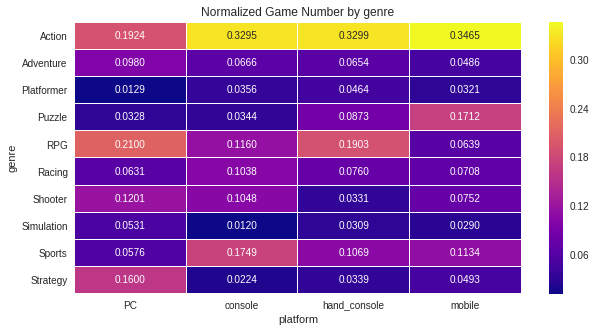

In [24]:
fig7, ax7 = plt.subplots(figsize=(10,5))
norm_plat_genre = normalize(plat_genre)
sns.heatmap(norm_plat_genre, annot=True, fmt='.4f', cmap='plasma', linewidths=0.1)
ax7.set_title('Normalized Game Number by genre')

#### Observation
From this graph, we can get many interest facts that we can hardly see from the first graph.
1. Action game have most percent for all plat form except PC platform.
2. Now, we can see the specialty of each platforms.  
    - For PC, Strategy, RPG, and Action game will be the majority; 
    - For console, Action and Sports game will be its attract point; 
    - For handheld console, RPG and Action game should be expected more; 
    - For mobile, Puzzle and Action, which is surprising, make the mojority.

In [25]:
swarm = genre_df[genre_df['genre'].isin(top_10_genres.index)]

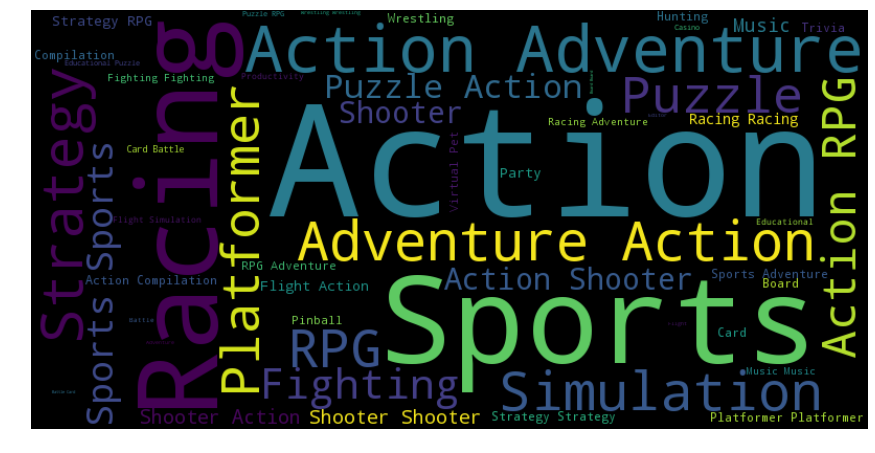

In [26]:
# Try to make a word cloud of genre
initial = genre_df['genre'].str.split(',')
genre_words= []
for item in initial:
    for word in item:
        genre_words.append(word.strip())
wc_text = ' '.join(genre_words)

wordcloud = WordCloud(background_color='black', width=800, height=400).generate(wc_text)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Analyse the relation between score and editors_choice

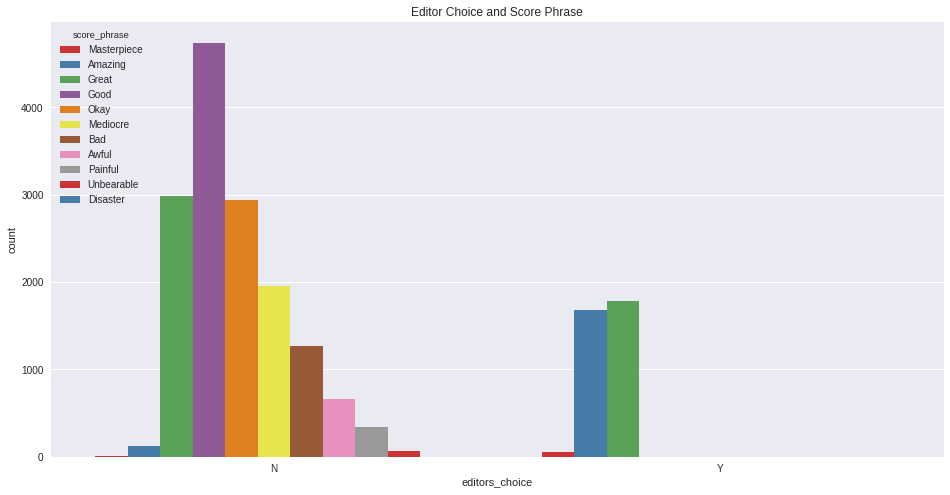

In [27]:
fig8, ax8 = plt.subplots(figsize=(16,8))
editor_score = game_df.groupby(['editors_choice', 'score_phrase'])['score'].count().reset_index()
sns.barplot(data=editor_score, x='editors_choice', y='score', hue='score_phrase', \
            hue_order=score_list, palette='Set1')
ax8.set_ylabel('count')
ax8.set_title('Editor Choice and Score Phrase')

#### Observation
**Editor choice is real a good indicator for game quality.** From the graph, we can see the game choosed by editor are all above Great phrase. Editor choosed most of the amazing and masterpiece game. However, for great game, because the number of it, so it's depend on editor. 

### Other Analyses


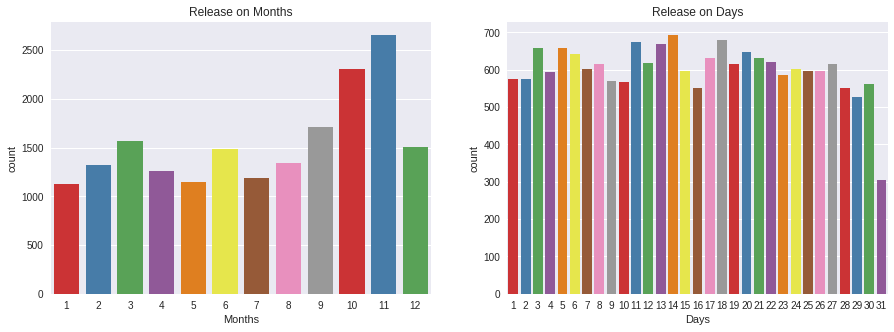

In [28]:
# Release trend by month and day
fig, ax= plt.subplots(1,2, figsize=(15,5))
sns.countplot(class_df['release_month'], ax=ax[0], palette='Set1').set_title('Release on Months')
ax[0].set_xlabel('Months')
sns.countplot(class_df['release_day'], ax=ax[1], palette='Set1').set_title('Release on Days')
ax[1].set_xlabel('Days')

#### Observation
Which day have most of game released?  
14th Nov!!!

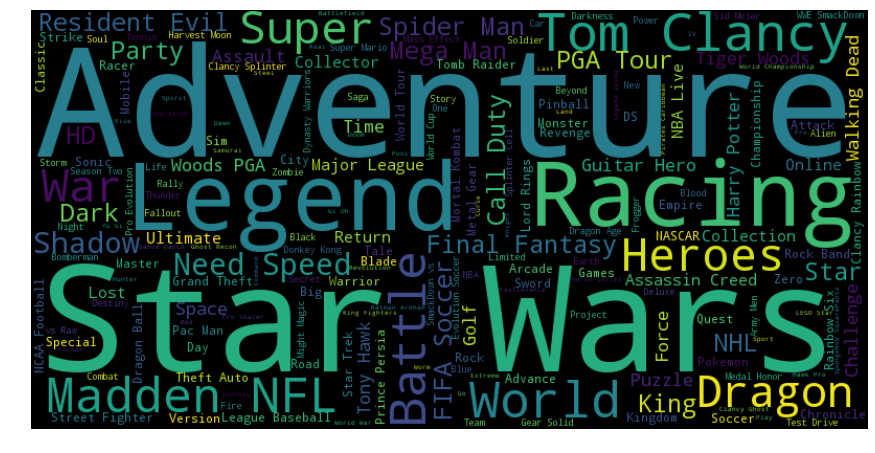

In [29]:
# Make a modified title wordcloud
from wordcloud import STOPWORDS
# From the first time word cloud, I find there are several words are no meaning
# Like edition, II, III, so we can add them to STOPWORDS
STOPWORDS.update(['edition', 'II', 'III', '3D', 'Game'])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black', 
                      width=800, 
                      height=400).generate(" ".join(game_df['title']))
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#### Observation
After I looked at this word cloud, I decide to make a game. Its name is 
### Tom Clancy's Star Wars Advanture Legend with Racing to World Battle: Madden NFL Heroes

### Reference
1. [THE HISTORY OF IGN](http://www.ign.com/articles/2008/01/11/origins-the-history-of-ign)
2. [Wikipedia IGN](https://www.wikiwand.com/en/IGN)
3. [Wikipedia Next Generation (magazine)](https://www.wikiwand.com/en/Next_Generation_(magazine))
4. [Evolution of mobile phone](http://www.hongkiat.com/blog/evolution-of-mobile-phones/)
5. [Timeline of game console released](https://www.wikiwand.com/en/Timeline_of_video_game_console_releases)
